## Descripción

* Para esta sesión trabajaremos con una base de datos sobre los precios de inmuebles en la ciudad de Ames, Iowa. * La base se compone de 2930 registros y contiene un gran número de atributos.
* Nuestro objetivo es generar un modelo que prediga de forma adecuada los precios de inmuebles, medidos con la variable Sale_Price.
* A diferencia de otras sesiones donde implementábamos el preprocesamiento a mano, ahora haremos uso de los archivos serializados en la sesión pasada.

## Ejercicio 1: Preparación del ambiente de trabajo

* Importe las librerías clásicas a utilizar.
* Para este ejercicio Random Forest de RegresiónDe manera adicional importe las funciones y clases necesarias para generar un desempeño de métricas en problemas de regresión.
* Elimine la columna 'Unnamed: 0' cuando cargue los datos.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('ames_housing.csv').drop(columns='Unnamed: 0')


## Ejercicio 2: Importación de archivos serializados

* Importe su modelo entrenado y sus conjuntos de entrenamiento y validación serializados la sesión pasada y evalúe el desempeño del modelo de su compañero con el suyo ¿Cuál es mejor? Si no puede ejecutar el modelo, comente cuáles pueden ser los causantes.
* No es necesario que realice diagnósticos gráficos sobre el modelo, sólo reporte sus métricas.
* Para importar un archivo serializado, puede ocupar la siguiente línea de código:

```python
import pickle
archivo_modelo=pickle.load(open("archivos_modelo.sav","rb"))
```

In [3]:
import pickle
tree_pablob = pickle.load(open("Bpablo_bustamante07.sav", "rb")) 

In [4]:

X_test = pickle.load(open("pbustamantei-X_test.sav", "rb"))
y_test = pickle.load(open("pbustamantei-y_test.sav", "rb"))
X_train = pickle.load(open("pbustamantei-X_train.sav", "rb"))
y_train = pickle.load(open("pbustamantei-y_train.sav", "rb"))

In [5]:
tree_pablob.get_params

<bound method BaseEstimator.get_params of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6.0,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=16354, splitter='best')>

In [6]:
print("Test MSE:", mean_squared_error(y_test, tree_pablob.predict(X_test)).round(5))
print("Test MAE:", median_absolute_error(y_test, tree_pablob.predict(X_test)).round(5))
print("Test R2:", r2_score(y_test, tree_pablob.predict(X_test)).round(5)) 

Test MSE: 1022087303.5724
Test MAE: 15370.35294
Test R2: 0.85598


Comentario: Evaluare contra otro modelo generado por mi con otra semilla

In [7]:
X_test_pablob = pickle.load(open("Bpbustamantei-X_test.sav", "rb"))
y_test_pablob = pickle.load(open("Bpbustamantei-y_test.sav", "rb"))
X_train_pablob = pickle.load(open("Bpbustamantei-X_train.sav", "rb"))
y_train_pablob = pickle.load(open("Bpbustamantei-y_train.sav", "rb"))

In [8]:
print("Test MSE:", mean_squared_error(y_test_pablob, tree_pablob.predict(X_test_pablob)).round(5))
print("Test MAE:", median_absolute_error(y_test_pablob, tree_pablob.predict(X_test_pablob)).round(5))
print("Test R2:", r2_score(y_test_pablob, tree_pablob.predict(X_test_pablob)).round(5))

Test MSE: 1678188216.84753
Test MAE: 17026.7619
Test R2: 0.74761


La semilla influyó bastante en el desempeño del modelo

## Ejercicio 3: Evaluación Random Forest

* En base a los conjuntos de entrenamiento serializados, genere un modelo utilizando sklearn.ensemble.RandomForest sin modificar hiperparámetros, sólo declarando la semilla pseudoaleatoria.
* Reporte su desempeño y compárelo con su modelo de la sesión pasada, así como con el de su compañero.

In [9]:
forest = RandomForestRegressor(random_state=16254).fit(X_train, y_train) 

In [10]:
 y_hat = forest.predict(X_test) 

In [11]:
print("Test MSE:", mean_squared_error(y_test, y_hat))
print("Test MAE:", median_absolute_error(y_test, y_hat))
print("Test R2:", r2_score(y_test, y_hat))

Test MSE: 1033779417.3989758
Test MAE: 12622.559999999998
Test R2: 0.8543359708374889


Comentarios: Podemos observar un desempeño mejor que los modelos anteriores.

## Ejercicio 4: Reporte las métricas de desempeño

* Para afinar el comportamiento de nuestro modelo, evalúe su desempeño los siguientes hiperparámetros:
* max_features: None, log2, sqrt.n_estimators: Evaluar entre 20 y 1000 en pasos de 50.
* Guarde la tasa de error en la exactitud medida con OOB.
* Grafique el comportamiento.

In [12]:
tmp_oob_none, tmp_oob_log2, tmp_oob_sqrt = [], [], []
tmp_test_r2_none, tmp_test_r2_sqrt, tmp_test_r2_log2 = [], [], []
n_estimators = range(20, 1000, 50)

In [13]:
for i in n_estimators:
    forest_none = RandomForestRegressor(n_estimators=i, 
                                        max_features=None, 
                                        oob_score=True, 
                                        random_state=16254).fit(X_train, y_train)
    forest_log2 = RandomForestRegressor(n_estimators=i,
                                       max_features='log2',
                                       oob_score=True,
                                       random_state=16254).fit(X_train, y_train)
    forest_sqrt = RandomForestRegressor(n_estimators=i,
                                       max_features='sqrt',
                                       oob_score=True,
                                       random_state=16254).fit(X_train, y_train)
    # guardo el error en oob
    tmp_oob_none.append(1-forest_none.oob_score_)
    tmp_oob_log2.append(1-forest_log2.oob_score_)
    tmp_oob_sqrt.append(1-forest_sqrt.oob_score_)
    # guardo el error en la exactitud
    tmp_test_r2_none.append(1-r2_score(y_test, forest_none.predict(X_test)))
    tmp_test_r2_log2.append(1-r2_score(y_test, forest_log2.predict(X_test)))
    tmp_test_r2_sqrt.append(1-r2_score(y_test, forest_sqrt.predict(X_test))) 

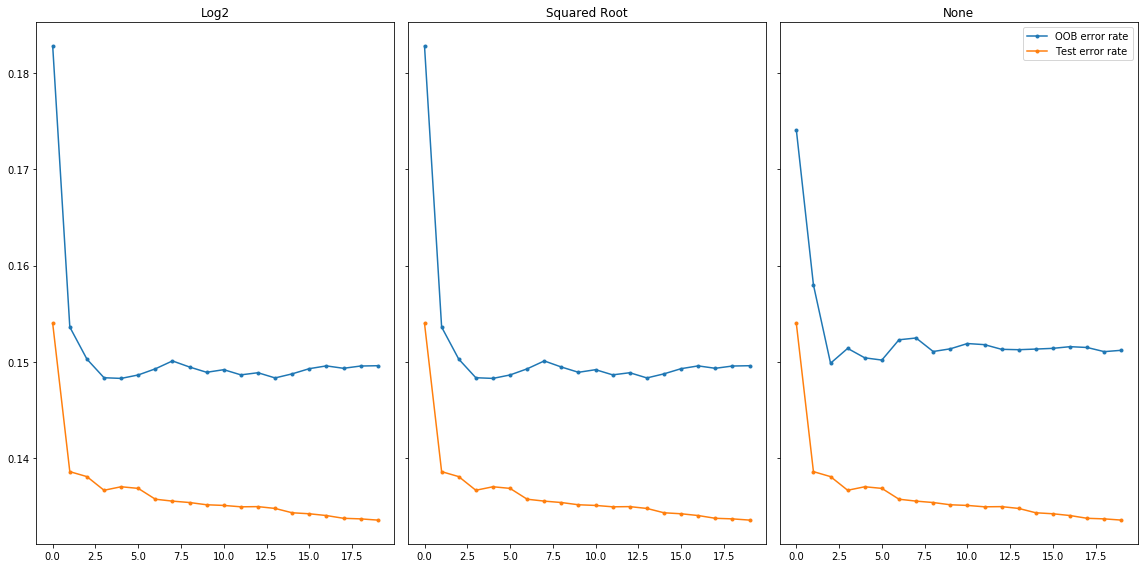

In [14]:
plt.rcParams['figure.figsize'] = (16, 8);
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True);
axs[0].plot(tmp_oob_log2, '.-', label='OOB error rate');
axs[0].plot(tmp_test_r2_log2, '.-', label='Test error rate');
axs[0].set_title('Log2');
axs[1].plot(tmp_oob_sqrt,'.-',  label='OOB error rate');
axs[1].plot(tmp_test_r2_sqrt,'.-',  label='Test error rate');
axs[1].set_title('Squared Root');
axs[2].plot(tmp_oob_none, '.-', label='OOB error rate');
axs[2].plot(tmp_test_r2_sqrt,'.-',  label='Test error rate');
axs[2].set_title('None');
plt.tight_layout();
plt.legend();

## Ejercicio 5: Refactorice el modelo

In [15]:
new_df = pd.DataFrame({'n_estimator':n_estimators,
                       'none_oob_score':tmp_oob_none,
                       'log2_oob_score':tmp_oob_log2,
                       'sqrt_oob_socre':tmp_oob_sqrt})
new_df.sample(5)

n_estimator  none_oob_score  log2_oob_score  sqrt_oob_socre
3           170        0.151398        0.148351        0.148351
10          520        0.151902        0.149186        0.149186
15          770        0.151403        0.149292        0.149292
13          670        0.151261        0.148330        0.148330
18          920        0.151060        0.149567        0.149567

In [16]:
new_df[new_df.log2_oob_score.round(6) == 0.148281] 

n_estimator  none_oob_score  log2_oob_score  sqrt_oob_socre
4          220        0.150417        0.148281        0.148281

In [17]:
forest_best = RandomForestRegressor(n_estimators=220,
                                    max_features='sqrt',
                                    oob_score=True,
                                    random_state=16254).fit(X_train, y_train)

In [18]:
y_hat_best = forest_best.predict(X_test) 

In [19]:
print("Test MSE:", mean_squared_error(y_test, y_hat_best))
print("Test MAE:", median_absolute_error(y_test, y_hat_best))
print("Test R2:", r2_score(y_test, y_hat_best))

Test MSE: 972486867.5895678
Test MAE: 12798.263636363641
Test R2: 0.8629723584581147


Comentario: Mejora el desempeño 86%. Cabe señalar que se obtiene el mismo desempeño utilizando el hiperparámetro log2.